<div style="font-size:14px; font-family: Arial, sans-serif; ">

### Model LDA (Latent Dirichlet Allocation)

Mục tiêu của LDA là mapping toàn bộ các văn bản sang các topics tương ứng sao cho các từ trong mỗi một văn bản sẽ thể hiện những topic tưởng tượng ấy.
</div>

<div style="font-size:14px; font-family: Arial, sans-serif; ">

#### 1. LDA giảm thiểu khối lượng tính toán
Thông qua việc thống kê tần suất xuất hiện của các từ quan trọng trong một văn bản ta nhận thấy rằng có một số văn bản sẽ có một tợp hợp các từ gần như nhau. 

-> Chúng sẽ liên quan với nhau về một chủ đề nào đó.


<div style="display: flex; justify-content: center;">
    <img src="images\LDA.png" alt="Alternative text" />
</div>

-> Cần có num_words * num_documents = 500*1000 = 500000 threads cho nó. Số lượng này tạo ra một chi phí tính toán rất lớn. 

-> Chính vì thế một cách đơn giản và tốn kém ít chi phí hơn đó là tìm cách giảm số lượng các kết nối giữa documents và words bằng cách tạo ra những topics trung gian nhóm các từ liên quan vào chung 1 nhóm và kết nối thông qua các nhóm này.

</div>


<div style="font-size:14px; font-family: Arial, sans-serif; ">

#### 2. Làm thế nào để giảm chiều dữ liệu

Bằng cách thêm một layer nhân tố ẩn có số units tương ứng với số lượng các topics mà chúng ta đã xác định trước trong mô hình

-> giảm số lượng threads kết nối đến documents -> giảm chi phí tính toán.
<div style="display: flex; justify-content: center;">
    <img src="images\LDA_1.png" alt="Alternative text" />
</div>

</div>

<div style="font-size:14px; font-family: Arial, sans-serif; ">

#### 3. Ứng dụng của gensim trong bài toán LDA

- Các bước xây dựng model LDA:
  - Xây dựng từ điển cho mô hình
  - Mã hóa bộ văn bản bằng cách mapping văn bản với từ điển.
  - Xác định số lượng topics ẩn cần tạo.
  - Huấn luyện mô hình.

- LDAMulticore: tính toán song song trên CPU với nhiều threads
- LDAModel: single-thread, ít khả năng gặp lỗi.
- Truyền vào model theo batch -> huấn luyện những bộ dữ liệu có kích thước lớn hơn RAM.
- Số core càng nhiều -> thời gian xử lý càng giảm.

</div>

In [1]:
# Import Dataset
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
print(df.target_names.unique())
df.head()

['rec.autos' 'comp.sys.mac.hardware' 'comp.graphics' 'sci.space'
 'talk.politics.guns' 'sci.med' 'comp.sys.ibm.pc.hardware'
 'comp.os.ms-windows.misc' 'rec.motorcycles' 'talk.religion.misc'
 'misc.forsale' 'alt.atheism' 'sci.electronics' 'comp.windows.x'
 'rec.sport.hockey' 'rec.sport.baseball' 'soc.religion.christian'
 'talk.politics.mideast' 'talk.politics.misc' 'sci.crypt']


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


<Axes: xlabel='target_names'>

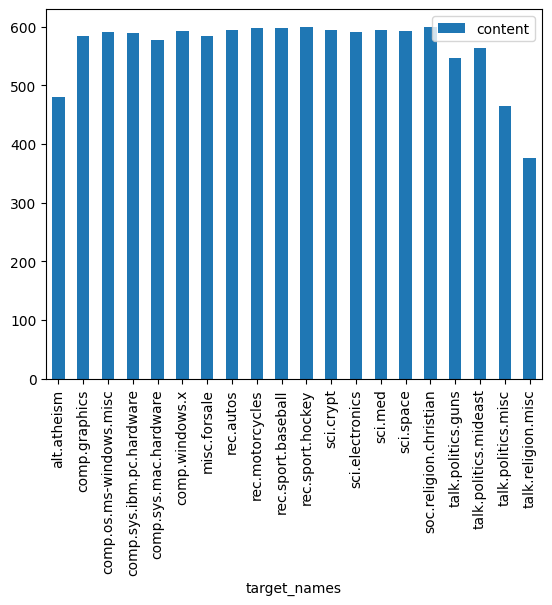

In [2]:
df[['target_names', 'content']].groupby(['target_names']).count().plot(kind='bar')

In [3]:
import gensim
data = list(df['content'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]

<div style="font-size:14px; font-family: Arial, sans-serif; ">

Gom cụm các từ đơn có tần suất xuất hiện cùng nhau thành những collocations có độ dài gồm 2 hoặc 3 từ.

-> sử dụng class Phrases trong gensim -> tăng độ chính xác

</div>

In [4]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['from', 'lerxst', 'wam_umd_edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd', 'edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


<div style="font-size:14px; font-family: Arial, sans-serif; ">

Loại bỏ các từ stopwords và chỉ lọc ra các từ có tag từ loại là ['NOUN', 'ADJ, 'VERB', 'ADV'].

</div>

In [5]:
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Thanh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from gensim.utils import simple_preprocess
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['wam_umd', 'thing', 'car', 'nntp_poste', 'host', 'rac_wam', 'university', 'park', 'line', 'wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


<div style="font-size:14px; font-family: Arial, sans-serif; ">

Từ điển (dictionary) và bộ văn bản (corpus) là 2 input chính cho model LDA.

</div>

In [13]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]


In [17]:
temp = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
print(temp)


[[('addition', 1), ('body', 1), ('bring', 1), ('call', 1), ('car', 5), ('day', 1), ('door', 2), ('early', 1), ('engine', 1), ('enlighten', 1), ('funky', 1), ('history', 1), ('host', 1), ('info', 1), ('know', 1), ('late', 1), ('lerxst', 1), ('line', 1), ('look', 2), ('mail', 1), ('make', 1), ('model', 1), ('name', 1), ('neighborhood', 1), ('nntp_poste', 1), ('park', 1), ('production', 1), ('rac_wam', 1), ('really', 1), ('rest', 1), ('see', 1), ('separate', 1), ('small', 1), ('spec', 1), ('sport', 1), ('thank', 1), ('thing', 1), ('university', 1), ('wam_umd', 1), ('wonder', 1), ('year', 1)]]


In [15]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

lda_model.save("models/model_lda_100.model")
# Load model
from gensim.models.ldamodel import LdaModel
lda = LdaModel.load("models/model_lda_100.model")

In [16]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"include" + 0.022*"mail" + 0.020*"information" + 0.019*"send" + '
  '0.016*"use" + 0.016*"source" + 0.015*"list" + 0.014*"system" + 0.014*"also" '
  '+ 0.014*"available"'),
 (1,
  '0.063*"line" + 0.050*"com" + 0.048*"write" + 0.036*"article" + '
  '0.033*"organization" + 0.025*"get" + 0.024*"nntp_poste" + 0.024*"host" + '
  '0.015*"know" + 0.014*"apr"'),
 (2,
  '0.047*"armenian" + 0.037*"greek" + 0.034*"village" + 0.034*"turk" + '
  '0.025*"turkish" + 0.023*"benefit" + 0.019*"statistic" + 0.018*"muslim" + '
  '0.015*"russian" + 0.014*"escape"'),
 (3,
  '0.028*"state" + 0.022*"government" + 0.022*"law" + 0.019*"issue" + '
  '0.019*"system" + 0.018*"public" + 0.018*"right" + 0.013*"case" + '
  '0.013*"physical" + 0.013*"provide"'),
 (4,
  '0.131*"program" + 0.098*"entry" + 0.038*"communication" + 0.034*"health" + '
  '0.033*"pitt" + 0.028*"session" + 0.019*"management" + 0.018*"configuration" '
  '+ 0.018*"buyer" + 0.017*"implementation"'),
 (5,
  '0.093*"team" + 0.087*"gam

<div style="font-size:14px; font-family: Arial, sans-serif; ">

Chỉ số perplexity và coherence score cho là những chỉ số cho ta biết chất lượng của mô hình là tốt hay xấu. Nó còn được dùng trong tìm kiếm số lượng topics nào là phù hợp với bộ dữ liệu. 

- Perplexity được xây dựng dựa trên logarit của hàm hợp lý tối đa (MLE) nên perplexity càng thấp thì chất lượng của model càng tốt. 

- Coherence score của mô hình càng cao thì mô hình sẽ càng tốt.

</div>

In [18]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -13.519442869567778

Coherence Score:  0.4911089624400574


In [19]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.330335  0.048458       1        1  21.531583
9      0.333412  0.117123       2        1  18.725565
10     0.306133  0.050263       3        1  15.982399
0      0.185089 -0.270382       4        1   8.504756
3      0.190247 -0.089396       5        1   7.066801
18     0.176616  0.218044       6        1   5.906725
12    -0.065296 -0.012533       7        1   5.711745
8      0.062170 -0.297534       8        1   3.780566
5     -0.021642  0.068935       9        1   1.723938
15    -0.077754  0.055292      10        1   1.703999
7     -0.099555 -0.029602      11        1   1.434237
16    -0.122347 -0.033248      12        1   1.375881
11    -0.117687  0.010386      13        1   1.257080
6     -0.125107  0.056725      14        1   1.080110
2     -0.126429  0.051053      15        1   0.989244
17    -0.144854 -0.029006      16        1   0.826603
19    -0.156612  0.017133      17        1   0.709142
13    -0.173559  0.028005      18        1   0.642008
4     -0.172253 -0.005053      19        1   0.622855
14    -0.180906  0.045337      20        1   0.424762, topic_info=                  Term          Freq         Total Category  logprob  loglift
4559                ax  55286.000000  55286.000000  Default  30.0000  30.0000
17                line  17746.000000  17746.000000  Default  29.0000  29.0000
184                com  14252.000000  14252.000000  Default  28.0000  28.0000
206              write  13797.000000  13797.000000  Default  27.0000  27.0000
45             article  10296.000000  10296.000000  Default  26.0000  26.0000
...                ...           ...           ...      ...      ...      ...
16258        explosive      0.045865      1.384787  Topic20 -11.7107   2.0538
7199          bear_arm      0.045864      1.384790  Topic20 -11.7107   2.0538
23030    violent_crime      0.045863      1.384771  Topic20 -11.7107   2.0538
44309  military_weapon      0.045863      1.384777  Topic20 -11.7108   2.0538
1833           defense     10.669263    328.334870  Topic20  -6.2613   2.0347

[921 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1392      2  0.998704      accept
2351     11  0.982559  accomplish
1473     14  0.994604     acquire
1559      5  0.562494         act
1559      6  0.159134         act
...     ...       ...         ...
40        3  0.758200        year
40        6  0.050429        year
40        9  0.178262        year
638       6  0.998989       young
2699      6  0.994675        zone

[1362 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 11, 1, 4, 19, 13, 9, 6, 16, 8, 17, 12, 7, 3, 18, 20, 14, 5, 15])

In [22]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame([[int(topic_num), round(prop_topic,4), topic_keywords]])], ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.4738,"line, com, write, article, organization, get, ...",From: lerxst@wam.umd.edu (where's my thing)\nS...
1,1,1,0.4566,"line, com, write, article, organization, get, ...",From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,2,10,0.3010,"year, time, work, car, high, get, first, go, n...",From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,3,1,0.4293,"line, com, write, article, organization, get, ...",From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,4,1,0.2726,"line, com, write, article, organization, get, ...",From: jcm@head-cfa.harvard.edu (Jonathan McDow...
5,5,9,0.2482,"say, think, people, make, know, point, see, re...",From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...
6,6,1,0.5480,"line, com, write, article, organization, get, ...",From: bmdelane@quads.uchicago.edu (brian manni...
7,7,12,0.2539,"ax, max, controller, scsi, headache, ide, mac,...",From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...
8,8,1,0.3116,"line, com, write, article, organization, get, ...",From: holmes7000@iscsvax.uni.edu\nSubject: WIn...
9,9,8,0.2393,"drive, window, card, system, driver, run, use,...",From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...
